In [1]:
# -*- coding: utf-8 -*-

import numpy as np

# 模拟数据
t = np.linspace(1, 100, 100)
a = 0.5
position = (a * t ** 2) / 2
position_noise = position + np.random.normal(0, 120, size=(t.shape[0]))


In [2]:
import matplotlib.pyplot as plt

plt.plot(t, position, label='truth position')
plt.plot(t, position_noise, label='only use measured position')



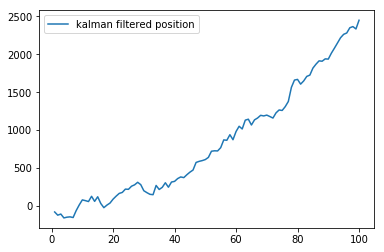

In [3]:
# 初试的估计导弹的位置就直接用GPS测量的位置
predicts = [position_noise[0]]
position_predict = predicts[0]

predict_var = 0
odo_var = 120 ** 2  # 这是我们自己设定的位置测量仪器的方差，越大则测量值占比越低
v_std = 50  # 测量仪器的方差
for i in range(1, t.shape[0]):
    dv = (position[i] - position[i - 1]) + np.random.normal(0, 50)  # 模拟从IMU读取出的速度
    position_predict = position_predict + dv  # 利用上个时刻的位置和速度预测当前位置
    predict_var += v_std ** 2  # 更新预测数据的方差
    # 下面是Kalman滤波
    position_predict = position_predict * odo_var / (predict_var + odo_var) + position_noise[i] * predict_var / (
            predict_var + odo_var)
    predict_var = (predict_var * odo_var) / (predict_var + odo_var) ** 2
    predicts.append(position_predict)

plt.plot(t, predicts, label='kalman filtered position')

plt.legend()
plt.show()